In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
# Reading the .names file to understand the structure
with open('/content/auto-mpg.names', 'r') as file:
    names_content = file.read()
print("Contents of .names file:")
print(names_content)
print("\n" + "="*50 + "\n")

Contents of .names file:
1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns c

In [3]:
# Defining column names for our dataset
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin', 'car_name']

In [4]:
# Reading the main data file
df = pd.read_csv('/content/auto-mpg.data',
                 delim_whitespace=True,  # Using whitespace as delimiter
                 names=column_names,     # Assign column names
                 na_values='?')          # Replace '?' with NaN

# Reading the original data file
df_original = pd.read_csv('/content/auto-mpg.data-original',
                         delim_whitespace=True,
                         names=column_names,
                         na_values='?')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
# Optimising the original data set
df_original.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [6]:
df_original['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 115., 153.,
       175., 170., 160.,  95.,  97.,  85.,  88.,  46.,  87.,  90., 113.,
       200., 210., 193.,  nan,  48., 100., 105., 180., 110.,  72.,  86.,
        70.,  76.,  65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92.,
       145., 137., 158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,
        67.,  83.,  78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98.,
        53.,  81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,
        63.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [7]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [8]:
df_original.isnull().sum()

,0
mpg,8
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


In [9]:
df_original = df_original.dropna()

In [10]:
df_original.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


In [11]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    float64
 7   origin        392 non-null    float64
 8   car_name      392 non-null    object 
dtypes: float64(8), object(1)
memory usage: 30.6+ KB


In [12]:
df_original['origin'].unique()

array([1., 3., 2.])

In [13]:
# Turning origin column from numeric to categorical
df_original['origin'] = df_original['origin'].replace({1: 'America', 2: 'Europe', 3: 'Asia'})
df_original.head()
df_original['origin'].unique()

array(['America', 'Asia', 'Europe'], dtype=object)

In [14]:
df_original.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [15]:
# Storing the original dataframe in another df after cleaning and optimising
df_clean = df_original.copy()
df_clean.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,America,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,America,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,America,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,America,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,America,ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,America,ford galaxie 500
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,America,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,America,plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,America,pontiac catalina
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,America,amc ambassador dpl


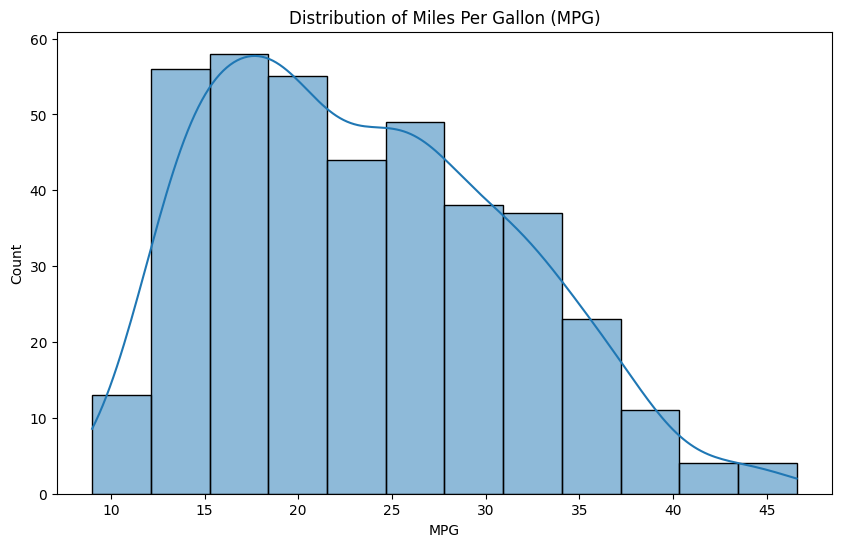

In [16]:
# 1. Distribution Analysis of Target Variable (MPG)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='mpg', kde=True,)
plt.title('Distribution of Miles Per Gallon (MPG)')
plt.xlabel('MPG')
plt.ylabel('Count')
plt.show()

In [17]:
# Calculate skewness of MPG
print(f"Skewness of MPG: {df_clean['mpg'].skew():.2f}")

Skewness of MPG: 0.46


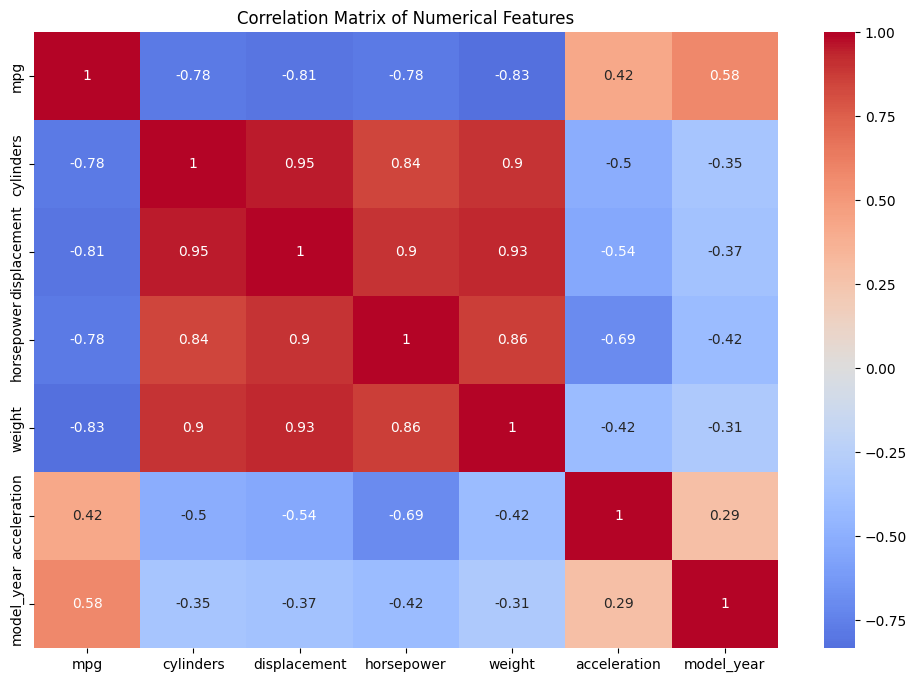

In [18]:
# 2. Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df_clean.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

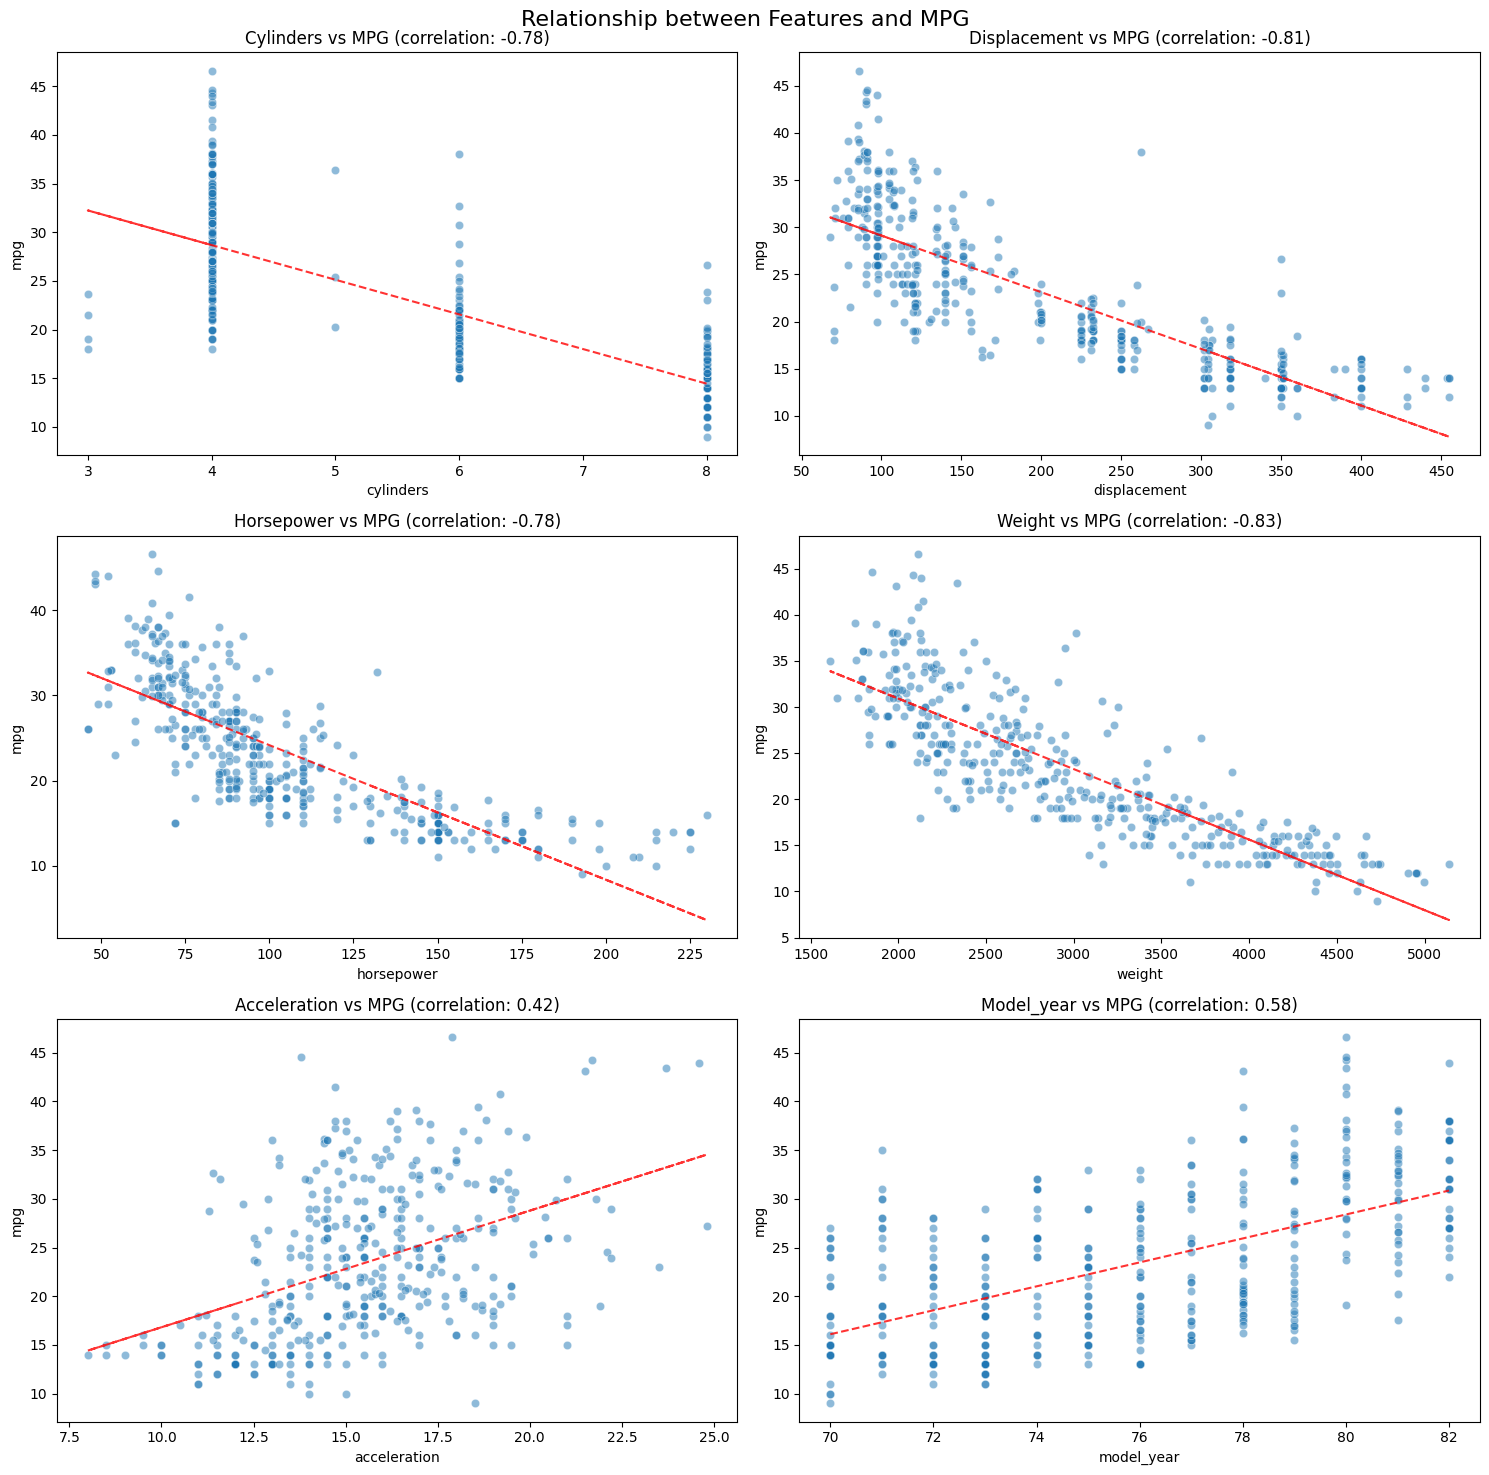

In [19]:
# 3. Feature Analysis with MPG
numerical_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Relationship between Features and MPG', fontsize=16)

for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2

    # Scatter plot
    sns.scatterplot(data=df_clean, x=feature, y='mpg', alpha=0.5, ax=axes[row, col])

    # Add trend line
    z = np.polyfit(df_clean[feature], df_clean['mpg'], 1)
    p = np.poly1d(z)
    axes[row, col].plot(df_clean[feature], p(df_clean[feature]), "r--", alpha=0.8)

    # Calculate correlation coefficient
    corr = df_clean[feature].corr(df_clean['mpg'])
    axes[row, col].set_title(f'{feature.capitalize()} vs MPG (correlation: {corr:.2f})')

plt.tight_layout()
plt.show()

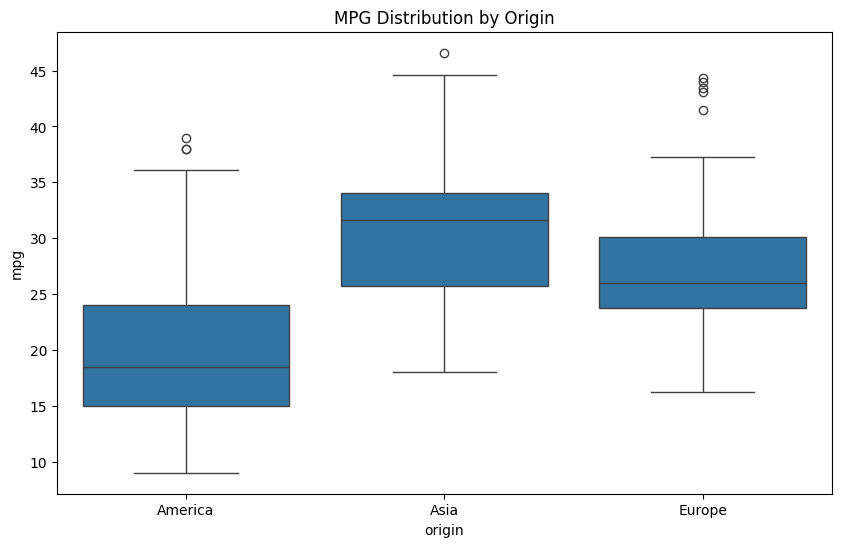

In [20]:
# 4. Box Plot for MPG by Origin
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='origin', y='mpg')
plt.title('MPG Distribution by Origin')
plt.show()

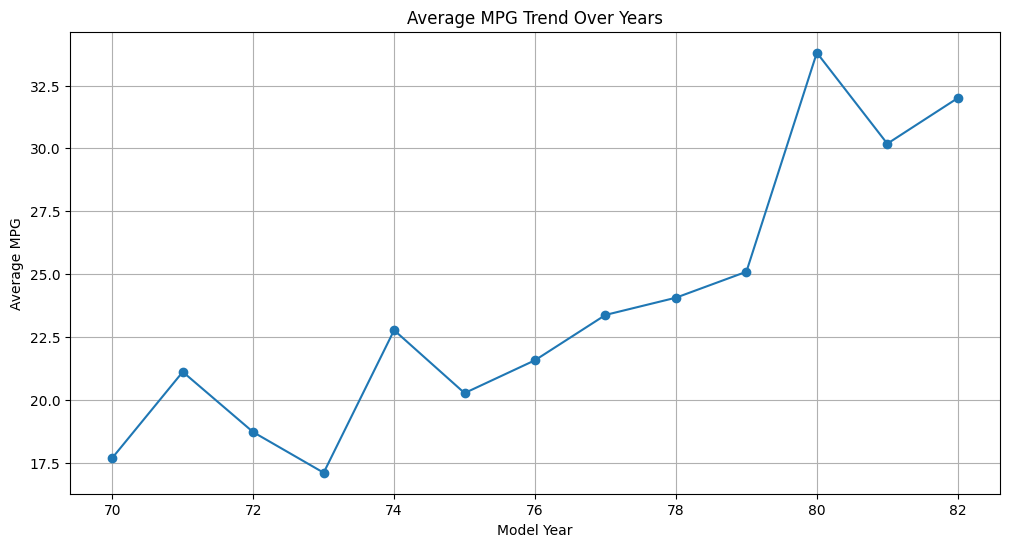

In [21]:
# 5. Time Series Analysis
plt.figure(figsize=(12, 6))
yearly_avg_mpg = df_clean.groupby('model_year')['mpg'].mean()
plt.plot(yearly_avg_mpg.index, yearly_avg_mpg.values, marker='o')
plt.title('Average MPG Trend Over Years')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True)
plt.show()

In [22]:
# 6. Statistical Summary and MPG Statistics by Origin
print("\nStatistical Summary of Numerical Features:")
print(df_clean.describe())
print("\nMPG Statistics by Origin:")
df_clean.groupby('origin')['mpg'].describe()


Statistical Summary of Numerical Features:
              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    392.000000  392.000000  
mean      15.541327   75.979592  
std        2.758864    3.683737  
min        8.000000   70.000000  
25%       13.775000   73.000000  
50%       15.500000   76.000000  
75%       17.025000   79.000000  
max       24.800000   82.000000  



,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
America,245.0,20.033469,6.440384,9.0,15.00,18.5,24.000,39.0
Asia,79.0,30.450633,6.090048,18.0,25.70,31.6,34.050,46.6
Europe,68.0,27.602941,6.580182,16.2,23.75,26.0,30.125,44.3


In [23]:
# Preparing the ML model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

X = df_clean[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y = df_clean['mpg']
X = pd.get_dummies(df_clean[['cylinders', 'displacement', 'horsepower', 'weight',
                            'acceleration', 'model_year', 'origin']], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Performing Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Performance Metrics:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.3f}")

    return rmse, mae, r2

In [25]:
# Training and evaluating multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    rmse, mae, r2 = evaluate_model(y_test, y_pred, name)
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}


Linear Regression Performance Metrics:
RMSE: 3.26
MAE: 2.46
R2 Score: 0.792

Ridge Regression Performance Metrics:
RMSE: 3.26
MAE: 2.46
R2 Score: 0.791

Random Forest Performance Metrics:
RMSE: 2.37
MAE: 1.70
R2 Score: 0.890

XGBoost Performance Metrics:
RMSE: 2.69
MAE: 1.76
R2 Score: 0.858


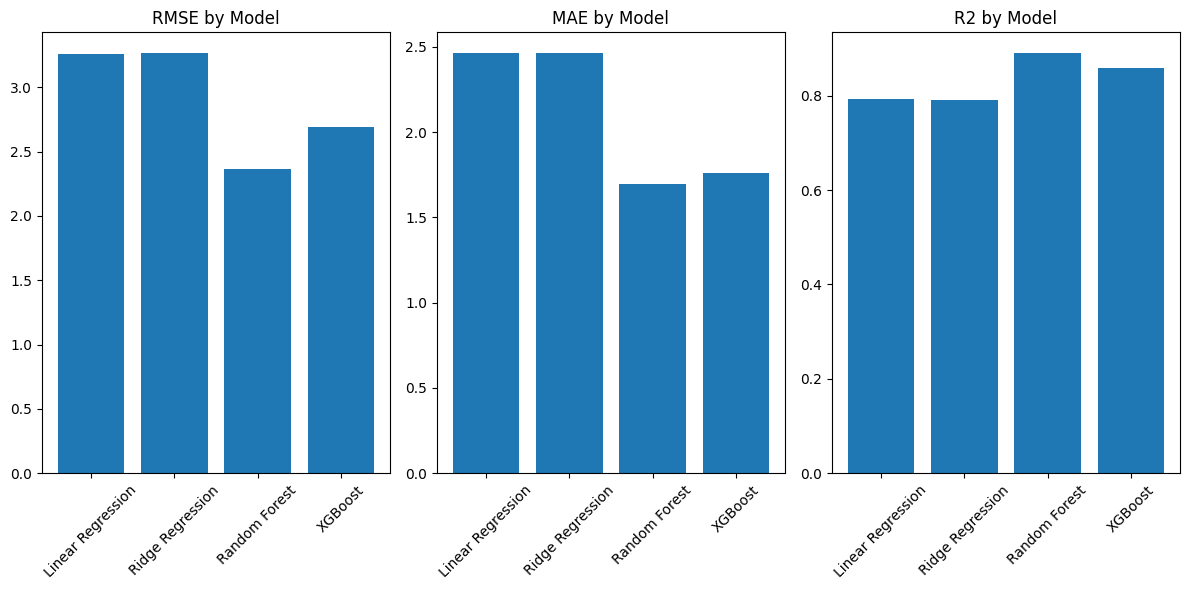

In [26]:
# Visualize model comparisons
plt.figure(figsize=(12, 6))
metrics = ['RMSE', 'MAE', 'R2']
for metric in metrics:
    values = [results[model][metric] for model in results.keys()]
    plt.subplot(1, 3, metrics.index(metric) + 1)
    plt.bar(results.keys(), values)
    plt.title(f'{metric} by Model')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

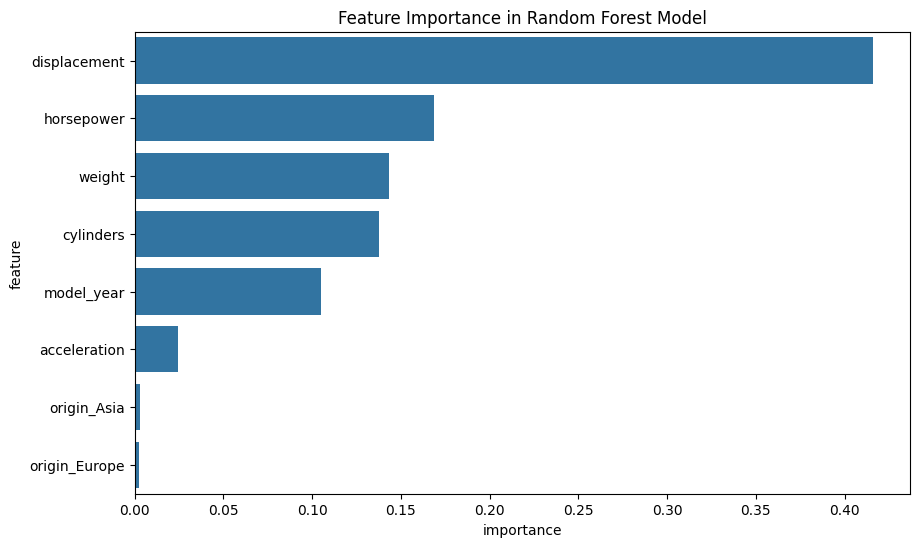

In [27]:
# Feature Importance Analysis for Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()

In [29]:
import pickle

# Saving the Random Forest model as it gives the best result
rf_model = models['Random Forest']
with open('model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Saving the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save feature names to ensure consistency in Streamlit app
with open("feature_names.pkl", "wb") as file:
    pickle.dump(X_train.columns.tolist(), file)